## ¿Qué es K-Means?

Es un algoritmo de agrupamiento (clustering) popular utilizado en el aprendizaje automático y el análisis de datos. Es una técnica de aprendizaje no supervisado que se utiliza para dividir un conjunto de datos en grupos o clústeres según sus similitudes o regularidades. El objetivo del K-means es encontrar grupos en los datos, con el número de grupos especificado por el usuario, que se representa con la variable **k**.

Así es cómo funciona el algoritmo K-means:

1. Inicialización: El algoritmo comienza cuando se especifica en cuántos k centros de clúster iniciales queremos dividir el conjunto de datos, a menudo llamados centroides. Estos centroides iniciales pueden ser elegidos de forma aleatoria o mediante algún otro método.

2. Asignación: Para cada punto de datos en el conjunto de datos, el algoritmo lo asigna al centroide más cercano basado en alguna métrica de distancia, típicamente la distancia euclidiana. Cada punto de datos se convierte en miembro del clúster asociado al centroide más cercano. Estos centroides son el punto central o el promedio de cada clúster.

3. Actualización: Después de que todos los puntos de datos se han asignado a clústeres, el algoritmo actualiza los centroides de cada clúster calculando la media de todos los puntos de datos en ese clúster. Esto significa que se actualiza la posición del centroide para reflejar la nueva agrupación. Estos centroides actualizados se convierten en los nuevos centros del clúster.

4. Repetición: Se repiten de manera iterativa los pasos 2 y 3 hasta que se alcance la convergencia, es decir, hasta que los centroides ya no cambien significativamente, la convergencia, o se alcance un número máximo de iteraciones predefinido.

 K-means es un algoritmo en el que a menudo se realizan múltiples inicializaciones con centroides aleatorios diferentes para evitar converger a un mínimo local.

<br> <hr>

## Ejercicio de K - Means en Python

En este ejercicio un archivo CSV contendrá los datos de entrada con los rasgos de personalidad, basados en la metodología ''Ocean: The Big Five'', de 140 usuarios 'famosos' de Twitter, las caracteristicas son:
- Nombre en Twitter (usuario)
- Grado de apertura mental a nuevas experiencias (op)
- Grado de organización (co)
- Grado de timidez (ex)
- Grado de empatía (ag)
- Grado de neuroticismo (ne)
- Promedio de palabras usadas en tweets (wordcount)
- Actividad laboral del usuario (categoria)

El algoritmo K-means agrupara a estos usuarios por las similitudes de sus personalidades, no por su actividad laboral, haciendo uso de solo 3 columnas de entrada, no de las 8, para poder proyectar los resultados en un gráfico 3D.


### Importación de librerias

El código empieza con la importación de librerías necesarias para poder desarrollar el ejercicio:

In [2]:
import pandas as pd #Pandas ofrece herramientas para el manejo, análisis y procesamiento de datos, basándose en la estructura de datos o arrays de la librería Numpy
import numpy as np #Se especializa en el cálculo numérico y el análisis de datos de una manera mucho más rápido que las listas de Python

#Matplotlip se especializa en la creación de graficas enriquecidas que se adaptan a todo tipo de datasets y permite una personalización profunda
import matplotlib.pyplot as plt #Es una interfaz basada en estado con un trazado similar a MATLAB

import seaborn as sb #Permite generar elegantes e informativos gráficos a partir de un conjunto de datos

#Las siguientes dos librerias tambien se usaran para poder realizar el algoritmo no supervisado
#sklearn unifica bajo un único marco los principales algoritmos y funciones, facilita las etapas de preprocesado, entrenamiento, optimización y validación de modelos predictivos
#sklearn.cluster reúne algoritmos populares de agrupación en clústeres no supervisados
from sklearn.cluster import KMeans #Agrupa datos intentando separar muestras en n grupos de igual varianza, minimizando un criterio conocido como inercia o suma de cuadrados dentro del grupo
#sklearn.metrics implementa funciones que evalúan el error de predicción para propósitos específicos
from sklearn.metrics import pairwise_distances_argmin_min #Calcula las distancias mínimas entre un punto y un conjunto de puntos

#mpl_toolkits.mplot3d agrega capacidades simples de trazado 3D a Matplotlib al proporcionar un objeto Axes que puede crear una proyección 2D de una escena 3D
from mpl_toolkits.mplot3d import Axes3D #Permite utilizar métodos de creación de Axes (no crear las instancias)

#Syntaxis: rcParams(figsize = (WIDTH_SIZE,HEIGHT_SIZE))
plt.rcParams['figure.figsize'] = (16, 9) #rcParams afecta a todos los trazos dentro de este archivo y figsize se utiliza para cambiar el tamaño de figura predeterminado (6.4 x 4.8) a uno propio (16 x 9)
#El paquete de estilo agrega soporte para “estilos” de trazado fáciles de cambiar con los mismos parámetros que un archivo matplotlib
plt.style.use('ggplot') #'ggplot' emula la estética de ggplot2 (un paquete de trazado popular para R)

### Cargar y visualizar los datos de entrada

En la primera línea se le asignan los datos dentro del archivo “analisis.csv” a la variable dataframe por medio de la función **read_csv( )**, dentro de este se escribe la letra r, en caso de tener caracteres especiales, y la ruta del archivo entre comillas (""). Esta función utiliza muchos argumentos, los principales son:

**Syntaxis usual: pd.read_csv(filepath_or_buffer, sep=‘,’, names=none, index_col=none, skipinitialspace=false)**

En la segunda línea se usa la función **head( )** para devolver las primeras n filas del objeto, el número predeterminado de elementos para mostrar es cinco, si se desea más o menos filas se necesita especificar.

In [3]:
dataframe = pd.read_csv(r"analisis.csv")
dataframe.head()

,usuario,op,co,ex,ag,ne,wordcount,categoria
0,3gerardpique,34.297953,28.148819,41.948819,29.370315,9.841575,37.0945,7
1,aguerosergiokun,44.986842,20.525865,37.938947,24.279098,10.362406,78.7970,7
2,albertochicote,41.733854,13.745417,38.999896,34.645521,8.836979,49.2604,4
3,AlejandroSanz,40.377154,15.377462,52.337538,31.082154,5.032231,80.4538,2
4,alfredocasero1,36.664677,19.642258,48.530806,31.138871,7.305968,47.0645,4


In [4]:
#Syntaxis: DataFrame.describe(percentiles=none, include=none, exclude=none, datetime_is_numeric=false)
dataframe.describe() #Calcula una variedad de estadísticas resumidas sobre una serie o las columnas de un DataFrame (excluyendo las vacías).

,op,co,ex,ag,ne,wordcount,categoria
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,44.414591,22.977135,40.764428,22.918528,8.000098,98.715484,4.050000
std,8.425723,5.816851,7.185246,7.657122,3.039248,44.714071,2.658839
min,30.020465,7.852756,18.693542,9.305985,1.030213,5.020800,1.000000
25%,38.206484,19.740299,36.095722,17.050993,6.086144,66.218475,2.000000
50%,44.507091,22.466718,41.457492,21.384554,7.839722,94.711400,3.500000
75%,49.365923,26.091606,45.197769,28.678866,9.758189,119.707925,7.000000
max,71.696129,49.637863,59.824844,40.583162,23.978462,217.183200,9.000000


El archivo contiene diferenciadas 9 categorías, las actividades laborales, estas son:

1 - Actor/actriz<br>
2 - Cantante<br>
3 - Modelo<br>
4 - Tv, series<br>
5 - Radio<br>
6 - Tecnología<br>
7 - Deportes<br>
8 - Politica<br>
9 - Escritor

La función **groupby( )** se utiliza para agrupar los datos según las categorías y aplicar una función a las categorías. Hace que la tarea de dividir el marco de datos según algunos criterios sea fácil y eficiente.

Para observar el criterio del grupo 'categoria' se imprimen los valores encontrados con la función **print( )** teniendo dentro la función **groupby( )**.

In [5]:
#Syntax: DataFrame.groupby(by=none, axis=0, level=none, as_index=true, sort=true, group_keys=true, squeeze=false, observed=false)
print(dataframe.groupby('categoria').size())

categoria
1    27
2    34
3     9
4    19
5     4
6     8
7    17
8    16
9     6
dtype: int64


La función **drop( )** se utiliza para eliminar filas o columnas especificadas mientras que **hist( )** se utiliza para crear un histograma por cada columna del DataFrame.

Entonces lo que mostrará sera el histograma de las columnas una vez eliminada la columna 'categoria'.

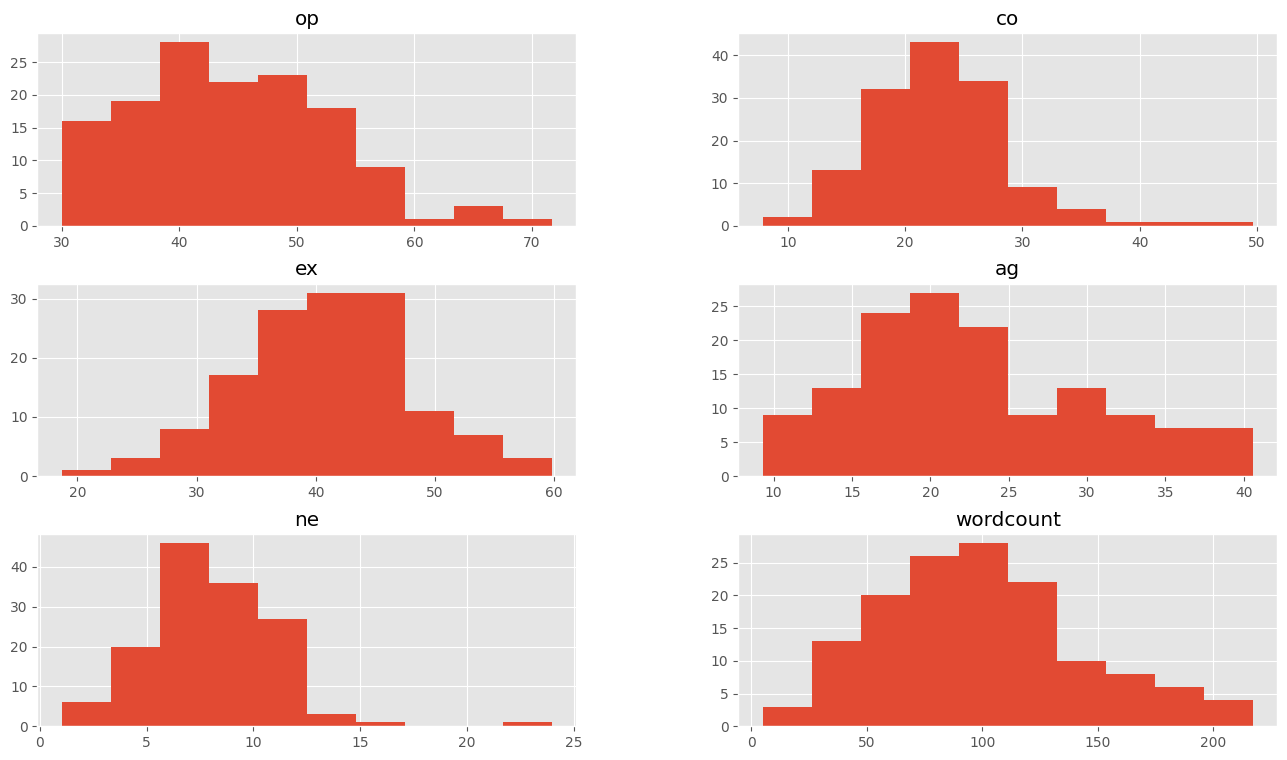

In [6]:
#Syntaxis: DataFrame.drop(labels=none, axis=0, index=none, columns=none, level=none, inplace=false, errors='raise')
dataframe.drop(['categoria'],axis=1).hist() #En algunos entornos de trabajo se agrega la sentencia 'axis' para especificar que la variable siguiente hace referencia al eje
plt.show() #Muestra todas las figuras abiertas

Como se menciono anteriormente, se usaran solo 3 dimensiones para poder visualizar los resultados de manera tridimencional, estos son: op, ex, y ag.

La función **pairplot( )** se utiliza para trazar múltiples distribuciones bivariados por pares en un conjunto de datos. Esta función utiliza muchos argumentos, los que se usan en el ejercicio son:

**Syntaxis: sb.pairplot(data=DataFrame, hue=none, size, vars=none, kind=reg)**

*En ‘data’ cada columna es una variable y cada fila es una observación.*<br>
*En ‘hue’ se indica la variable en "datos" para asignar aspectos de la trama a diferentes colores.*
*En ‘vars’ van las variables de "datos" para usar por separado para las filas y columnas de la figura.*
*‘kind’ indica el tipo de trama a hacer.*

C:\Users\kurat\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\kurat\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\kurat\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users

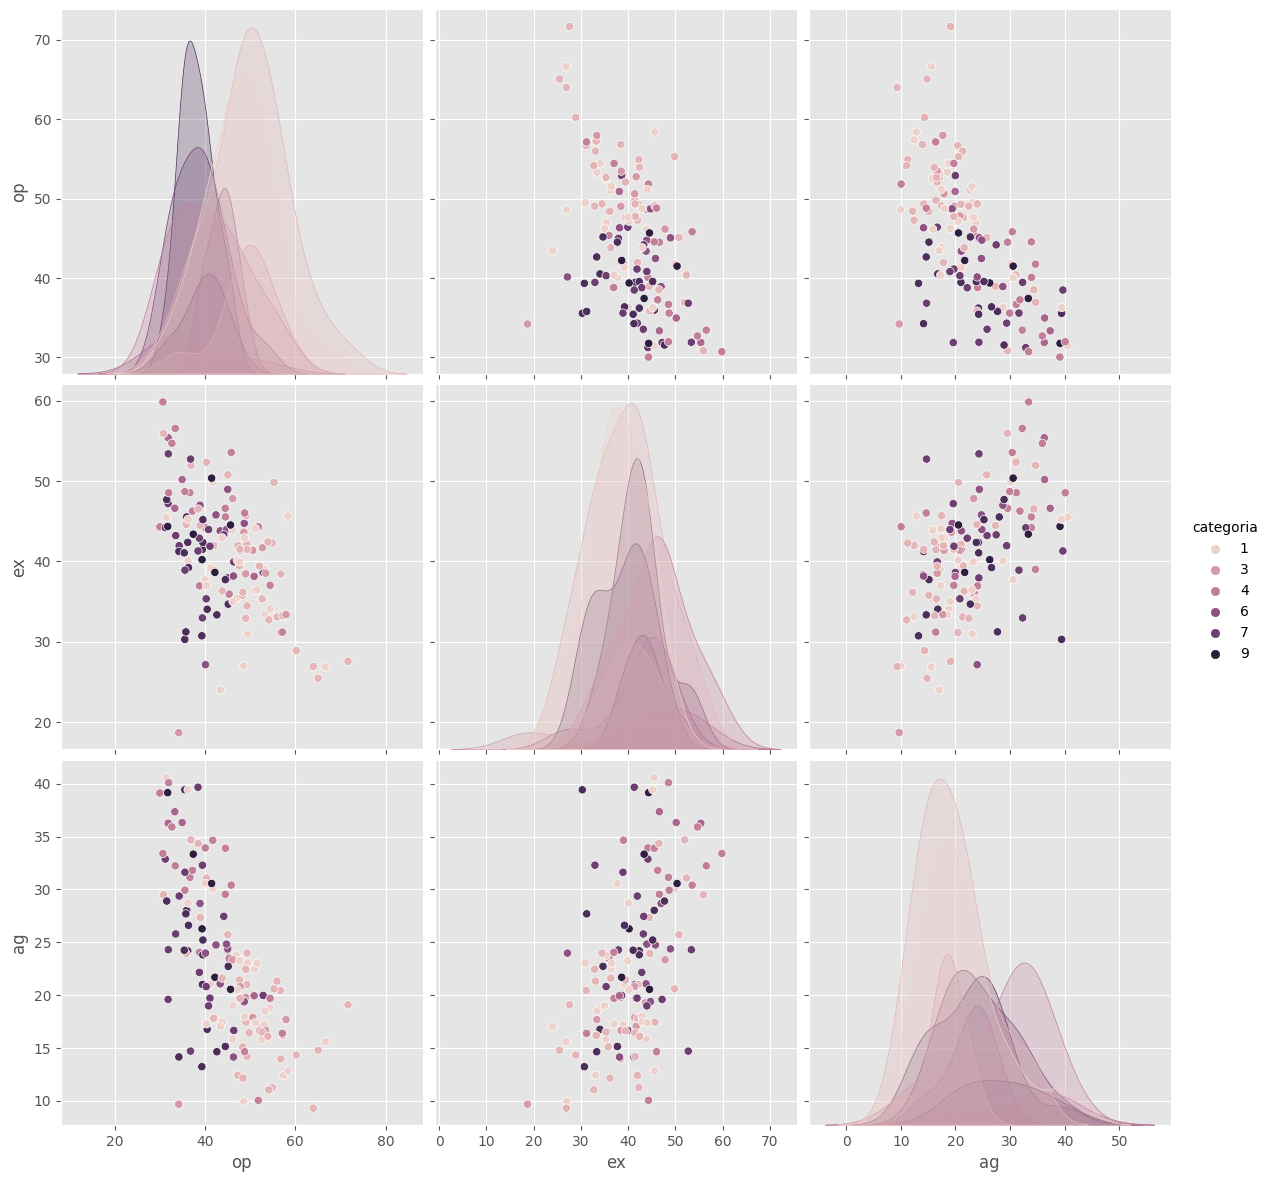

In [7]:
sb.pairplot(dataframe.dropna(), hue='categoria', size=4, vars=["op","ex","ag"], kind='scatter')

### Definir la entrada

La función **array( )** se utiliza para la creación de matrices con elementos homogéneos.

Para poder usar el algoritmo K-Means se cargan primero las 3 columnas de entrada en **X** y se agrega la columna 'categorias' a la variable **y**.

Para visualizar que se cargaron correctamente se hace uso del atributo **.shape** en la variable **X**, mostrando un total de 140 registros por 3 columnas.

In [8]:
#Syntaxis: numpy.array(object, dtype=none, copy=true, order='K', subok=false, ndmin=0, like=none)
X = np.array(dataframe[["op","ex","ag"]])
y = np.array(dataframe['categoria']) #Agregar la categoria
X.shape #Devuelve las dimensiones de la matriz

(140, 3)

El fig del inicio viene de la función **figure( )** que se utiliza para crear una nueva figura, en este caso guardada en la variable ax.

Dentro de ax se usa la función **plt.subplots( )** para crear una figura y un conjunto de subtramas el cual sera 3D (esto se especifica dentro de **subplot_kw**)

La variable **colores** se usa para almacenar los colores a utilizar en el diagrama de dispersión (9 colores), mientras que el for de **asignar** determina que color tendra cada variable (divididos por columnas).

En la penultima linea se crea un diagrama de dispersión haciendo uso de la función **scatter3D( )** y las dos variables mencionadas.

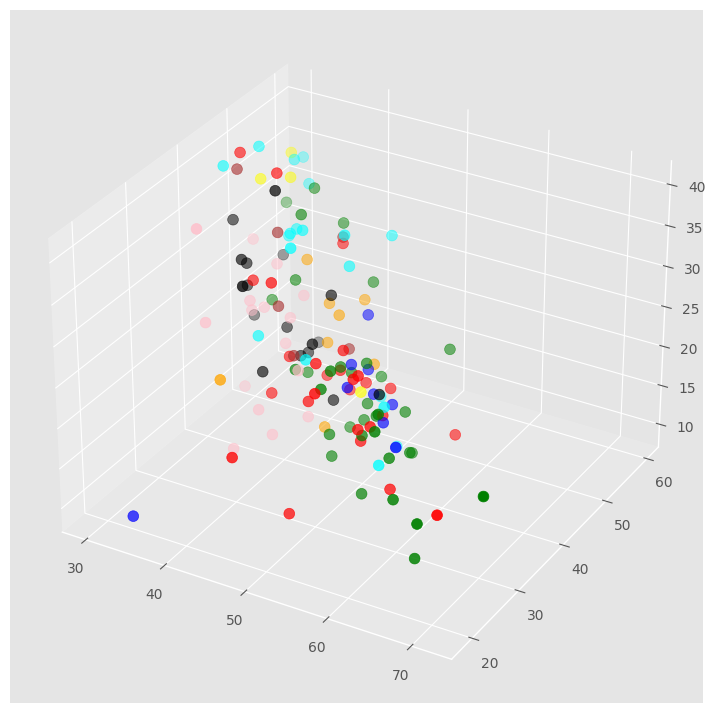

In [9]:
#matplotlib.pyplot.figure(num=None, figsize=None, dpi=None, frameon=True, clear=False)
#matplotlib.pyplot.subplots(nrows=1, ncols=1, sharex=False, sharey=False, squeeze=True, subplot_kw=None)
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

colores=['blue','red','green','blue','cyan','yellow','orange','black','pink','brown','purple']
asignar=[]
for row in y:
    asignar.append(colores[row])

#Axes3D.scatter(xs, ys, zs=0, zdir='z', s=20, c=None, depthshade=True, data=None)
ax.scatter3D(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
plt.show()

### Obtener el valor de K

En la primera línea se crea una lista llamada **Nc** que contiene un rango de números enteros del 1 al 20 el cual servira para como número de representación de clústers que se probarán en el rango. Despues la variable **kmeans**, siendo una lista de objetos KMeans, crea un modelo KMeans para cada valor de k en **Nc**.

En la tercera línea la variable **score** es una lista que almacena la puntuación (**inertia_**) de ajuste de cada modelo KMeans en función de la suma de las distancias al cuadrado de las muestras al centro de su grupo más cercano, ponderadas por los pesos de las muestras, si se proporcionan

En la cuarta línea matplotlib traza la curva del codo (el punto en el que la puntuación deja de mejorar significativamente), donde en el eje x se encuentra el número de clústeres (**Nc**) y en el eje y se encuentra la puntuación (**score**).

Las demás líneas sirven para darle nombre a las etiquetas y un titulo de la gráfica. Al final todo se muestra con la función **show( )** de matplotlib.

Según el autor, se considero a 5 como un buen número para K, esto puede variar de la experiencia de cada persona por lo que al final de cuentas esto dependerá del criterio de cada uno.

C:\Users\kurat\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\kurat\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\kurat\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set

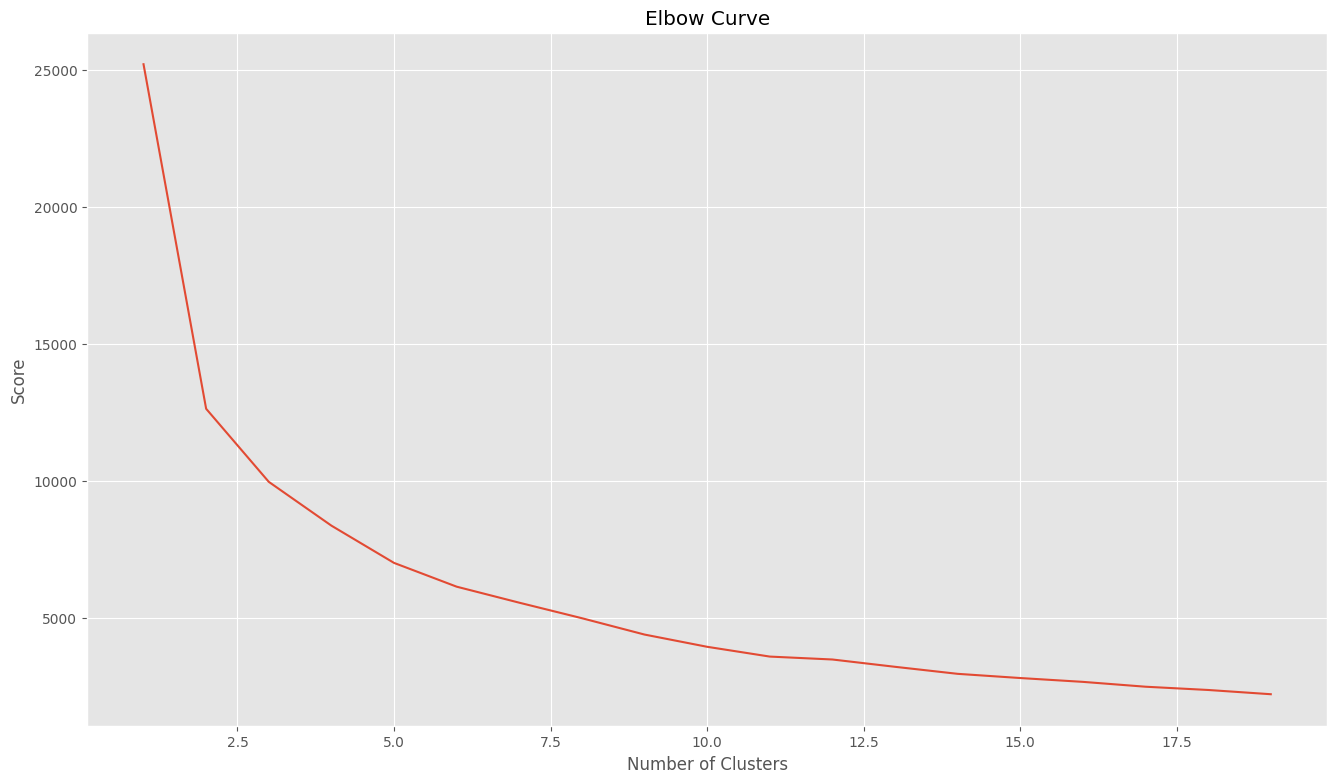

In [13]:
Nc = range(1, 20) #rango de 1 a 19, el 20 es el limite por lo que no cuenta

#Syntaxis: cluster.KMeans(n_clusters=8, init='k-means++', n_init='warn', inertia_=None, max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='lloyd')
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).inertia_ for i in range(len(kmeans))] # len() devuelve el número de elementos de un objeto, si es una cadena devuelve el núm. de caracteres de la cadena.
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

### Ejecutar K-Means

En la primera línea se inicializa un modelo de agrupación K-means con 5 grupos (lo que se determino como optimo) con el parámetro n_clusters. Después la función **fit( )** ajusto el modelo K-means a los datos de la variable X.

En la segunda línea la variable **centroids** recupera las coordenadas de los centroides de los grupos después de que el modelo K-means se haya ajustado a los datos. Esta variable se imprime en la tercera línea para poder visualizarla con la función **print( )**.

In [14]:
kmeans = KMeans(n_clusters=5).fit(X)
centroids = kmeans.cluster_centers_ #Coordenadas de los centros cluster
print(centroids)

[[49.85887044 41.15660338 17.54193885]
 [35.86526147 48.13229467 34.1429713 ]
 [42.9299832  32.83506265 20.97090145]
 [57.92200861 31.5039735  15.67199517]
 [39.28463985 43.45972012 24.20167321]]


C:\Users\kurat\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


En la primera línea se predice a qué grupo pertenece cada punto de datos en la variable **X** utilizando el modelo K-means, los resultados se almacenan en la variable **labels**, que contiene las asignaciones de grupo para cada punto de datos. En la segunda línea se hace lo mismo que en la variable **centroids**, guardar las coordenadas de los centroides de los grupos en la variable **C**.

En la tercera línea se crea una lista de colores que se utilizarán para asignar colores a cada uno de los 5 grupos. Entonces, en la cuarta línea la lista **asignar** almacena los colores correspondientes a cada punto de datos en función de su asignación de grupo mediante un bucle que recorre los valores en labels y selecciona el color correspondiente en la lista **colores**.

En la septima línea se crea una figura tridimensional **fig** y un objeto de ejes tridimensionales llamado **ax** para poder visualizarlo de manera tridimensional.

En la octava línea se trazan los puntos de los datos en el gráfico tridimensional. Los valores **X[:, 0]**, **X[:, 1]**, y **X[:, 2]** son las coordenadas de los datos en tres dimensiones. El atributo **c** se utiliza para asignar colores a cada punto de datos y **s** define el tamaño de los puntos.

En la última línea los datos son similares a la anterior, solo que aquí se trazan los centroides de los grupos en el gráfico tridimensional. Los valores **C[:, 0]**, **C[:, 1]**, y **C[:, 2]** son las coordenadas de los centroides de los grupos. El atributo **marker** define que se utilice un asterisco para representar los centroides, **c** asigna colores y **s** define el tamaño.

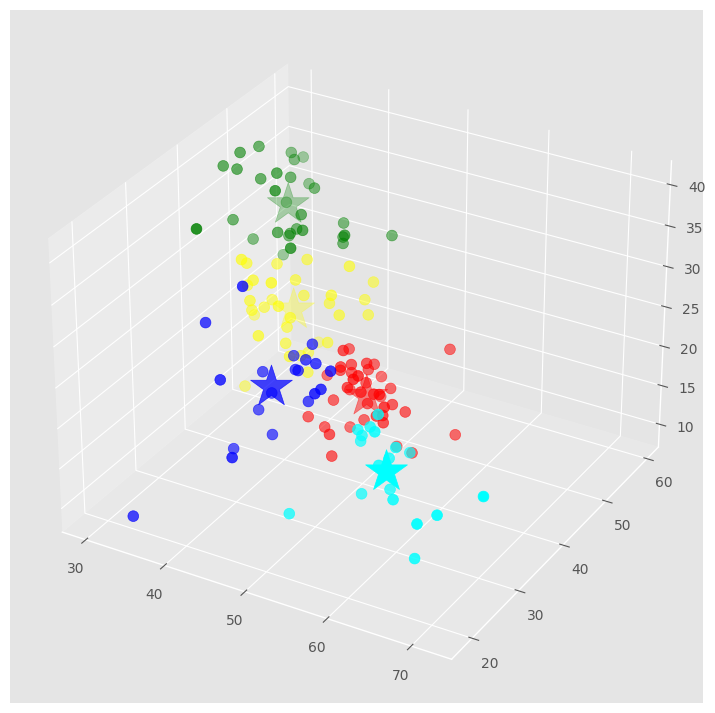

In [15]:
labels = kmeans.predict(X) # Predicting the clusters

C = kmeans.cluster_centers_ # Getting the cluster centers
colores=['red','green','blue','cyan','yellow']
asignar=[]
for row in labels:
    asignar.append(colores[row])
#Syntaxis: subplots(nrows=1, ncols=1, *, sharex=False, sharey=False, squeeze=True, width_ratios=None, height_ratios=None, subplot_kw=None, gridspec_kw=None, **fig_kw)
#subplot_kw dicta con palabras clave pasadas a la llamada add_subplot utilizada para crear cada subtrama, en este caso en 3D
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

#Syntaxis: Axes.scatter(x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, alpha=None, linewidths=None, *, edgecolors=None, data=None)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

En los siguientes tres bloques de códigos se hacen 3 gráficas en 2 dimensiones con las proyecciones a partir de la gráfica 3D para ayudar a visualizar los grupos y su clasificación:

Las dos primeras líneas de los tres bloques de código representan las dos dimensiones que se utilizarán para la visualización.

En la tercera línea se crea un gráfico de dispersión bidimensional utilizando los valores de **f1** en el eje x y los valores de **f2** en el eje y. Aún estando en el gráfico, en la cuarta línea se agregan los centroides de los grupos al gráfico bidimensional. Los valores **C[:, 0]** y **C[:, 1]** son las coordenadas x e y de los centroides, respectivamente.

En la última línea se muestra el gráfico con todas las visualizaciones configuradas.

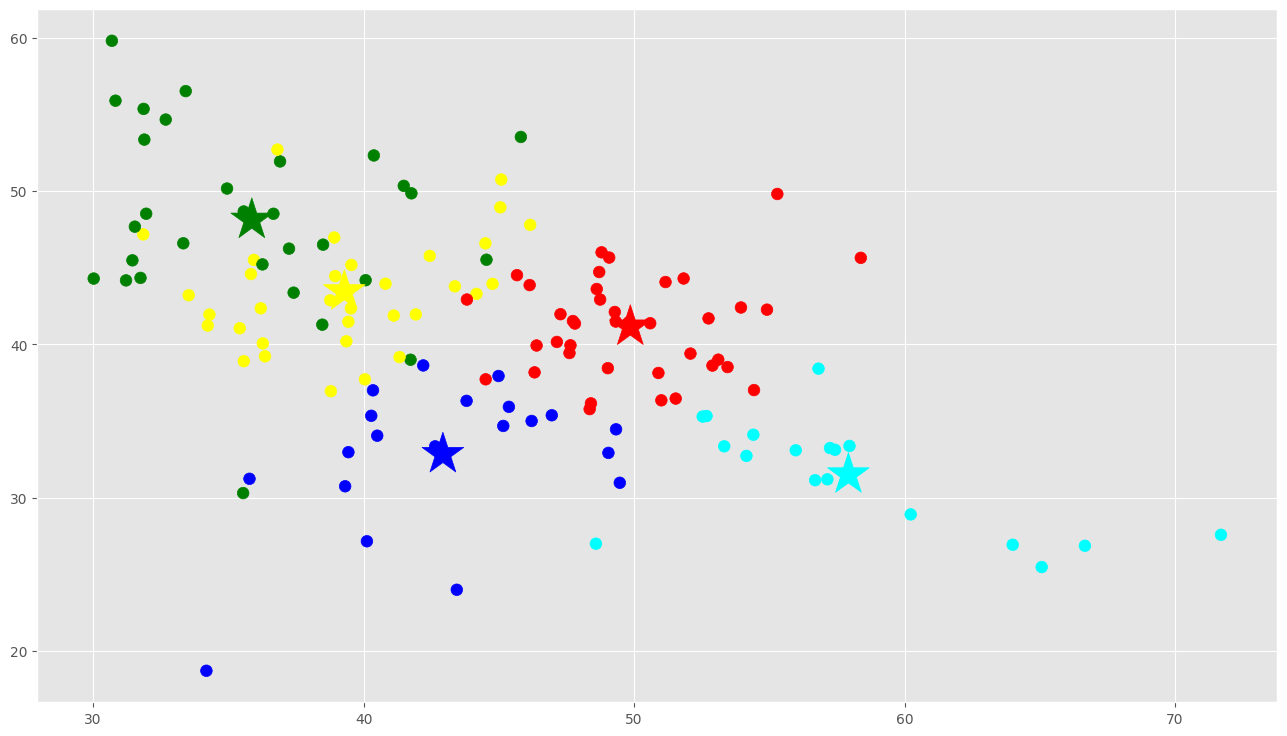

In [16]:
# Getting the values and plotting it
f1 = dataframe['op'].values #extrae los valores de las columnas 'op' del dataframe y lo almacena en f1
f2 = dataframe['ex'].values #extrae los valores de las columnas 'ex' del dataframe y lo almacena en f2

plt.scatter(f1, f2, c=asignar, s=70) #valores de f1 y f2 en la gráfica
plt.scatter(C[:, 0], C[:, 1], marker='*', c=colores, s=1000) #centroides en la gráfica
plt.show()

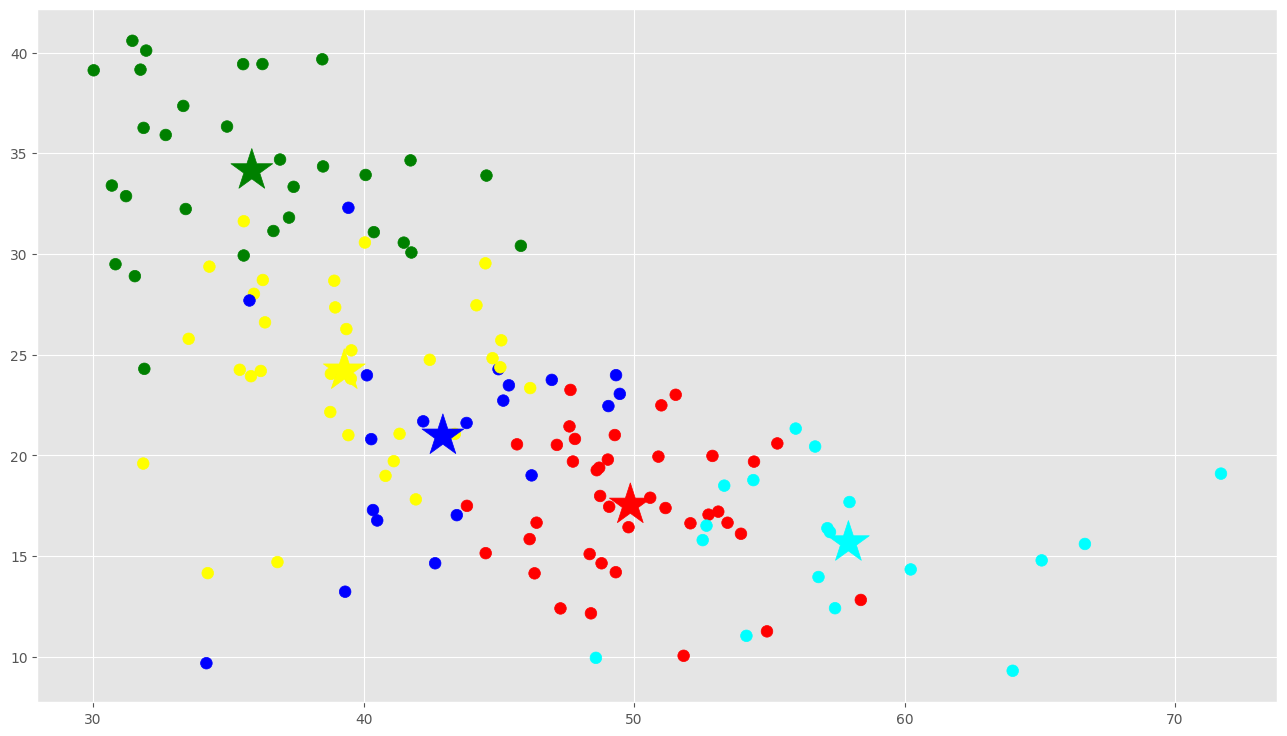

In [17]:
f1 = dataframe['op'].values #extrae los valores de las columnas 'op' del dataframe y lo almacena en f1
f2 = dataframe['ag'].values #extrae los valores de las columnas 'ag' del dataframe y lo almacena en f2

plt.scatter(f1, f2, c=asignar, s=70) #valores de f1 y f2 en la gráfica
plt.scatter(C[:, 0], C[:, 2], marker='*', c=colores, s=1000) #centroides en la gráfica
plt.show()

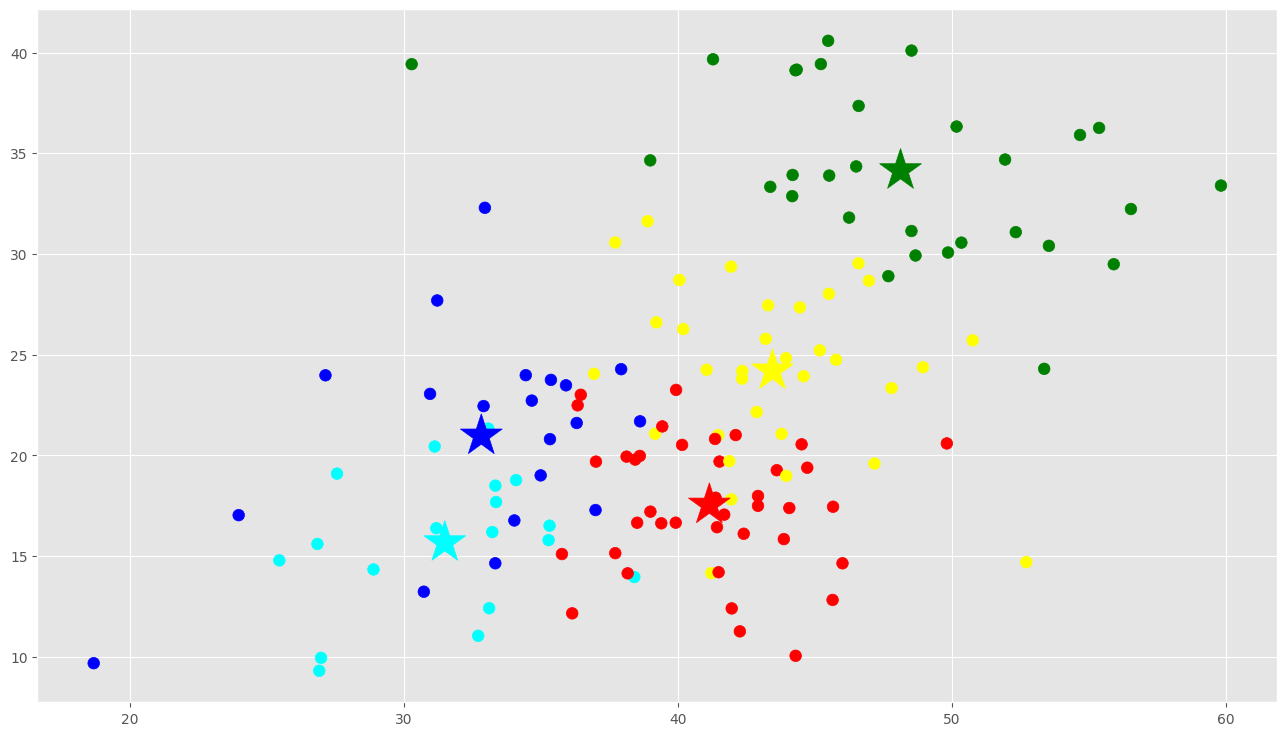

In [18]:
f1 = dataframe['ex'].values #extrae los valores de las columnas 'ex' del dataframe y lo almacena en f1
f2 = dataframe['ag'].values #extrae los valores de las columnas 'ag' del dataframe y lo almacena en f2

plt.scatter(f1, f2, c=asignar, s=70) #valores de f1 y f2 en la gráfica
plt.scatter(C[:, 1], C[:, 2], marker='*', c=colores, s=1000) #centroides en la gráfica
plt.show()

En la primera línea se crea un nuevo DataFrame llamado **copy**. En la segunda y tercera línea **copy** copia los valores de las columnas 'usuario' y 'categoria' del DataFrame original a sus columnas correspondientes en **copy**. En la cuarta línea se crea una nueva columna llamada 'label' en **copy**, esta columna se llena con las etiquetas de grupo almacenadas en la variable **labels**.

En la quinta línea se crea otro nuevo DataFrame llamado **cantidadGrupo**. En la sexta línea se crea una columna 'color' en **cantidadGrupo** y se llena con los colores asignados a cada grupo.

En la septima línea se calcula la cantidad de elementos en cada grupo, utilizando la función **groupby( )** en **copy**, agrupando por la columna 'label', que contiene las etiquetas de grupo. Luego, **size( )** cuenta cuántos elementos hay en cada grupo y almacena esta información en la columna 'cantidad' de **cantidadGrupo**.

En la última línea se escribe el nombre del DataFrame **cantidadGrupo** para poder observar cada uno de los clusters y cuantos usuarios tiene:

In [19]:
copy =  pd.DataFrame()
copy['usuario']=dataframe['usuario'].values
copy['categoria']=dataframe['categoria'].values
copy['label'] = labels;
cantidadGrupo =  pd.DataFrame()
cantidadGrupo['color']=colores
cantidadGrupo['cantidad']=copy.groupby('label').size()
cantidadGrupo

,color,cantidad
0,red,39
1,green,30
2,blue,20
3,cyan,18
4,yellow,33


En la primera línea la variable **group_referrer_index** almacena un índice booleano que verifica si la columna 'label' en **copy** es igual a 0, creando así, una serie de valores True y False que indican si cada fila pertenece al grupo con etiqueta 0.

En la segunda línea se filtra **copy** utilizando **group_referrer_index**, el resultado se guarda en **group_referrals** que contiene solo las filas que pertenecen al grupo con etiqueta 0.

En la tercera línea se crea un nuevo DataFrame llamado **diversidadGrupo**. En la cuarta línea se crea la columna 'categoria' y le asigna valores del 0 al 9. Estos valores representan las categorías que se desean contar en el grupo.

En la quinta línea se calcula la cantidad de elementos en cada una de las categorías dentro del grupo con etiqueta 0. Para hacer esto, primero se agrupa **group_referrals** por la columna 'categoria' y luego se utiliza la función **size( )** para contar la cantidad de elementos en cada categoría. Los resultados se almacenan en la columna 'cantidad'.

Al final se puede observar la diversidad en rubros laborales de cada uno. Por ejemplo en el grupo 0 (rojo), vemos que hay de todas las actividades laborales aunque predominan de actividad 2 y 3 correspondiente a Cantantes y Modelos con 10 y 13 famosos.

In [20]:
group_referrer_index = copy['label'] ==0
group_referrals = copy[group_referrer_index]

diversidadGrupo =  pd.DataFrame()
diversidadGrupo['categoria']=[0,1,2,3,4,5,6,7,8,9]
diversidadGrupo['cantidad']=group_referrals.groupby('categoria').size()
diversidadGrupo

,categoria,cantidad
0,0,NaN
1,1,10.0
2,2,13.0
3,3,6.0
4,4,3.0
5,5,1.0
6,6,2.0
7,7,2.0
8,8,1.0
9,9,1.0


Ahora se buscarán a los usuarios que están más cerca a los centroids de cada grupo que se podria decir que tienen los rasgos de personalidad característicos que representan a cada cluster:

Para esto se hace uso de la función **pairwise_distances_argmin_min( )** para encontrar el índice del punto de datos más cercano (en términos de distancia euclidiana) a cada uno de los centroides de los grupos generados por el modelo K-means. Dentro de esta función se encuentra **kmeans.cluster_centers_** que contiene las coordenadas de los centroides de los grupos calculados por el modelo K-means.

Al final cada elemento en **closest** es el índice del punto de datos en **X** que está más cerca del respectivo centroide de grupo.

In [21]:
#vemos el representante del grupo, el usuario cercano a su centroid
#Syntaxis: pairwise_distances_argmin_min(X, Y, *, axis=1, metric='euclidean', metric_kwargs=None)
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, X)
closest

array([ 21, 121, 120,  82,  64], dtype=int64)

En la primera línea se obtienen los valores de la columna 'usuario' del DataFrame original y los almacena en la variable **users**. El bucle de la segunda línea itera a través de los índices almacenados en la variable **closest** donde cada valor row en **closest** es el índice de un punto de datos en X que es el más cercano a un centroide de grupo.

En la tercera línea, dentro del bucle, se imprime el nombre de usuario correspondiente al punto de datos que tiene el índice row en el DataFrame original.

In [22]:
users=dataframe['usuario'].values
for row in closest:
    print(users[row])

carmenelectra
SerranoIsmael
SarahPalinUSA
JudgeJudy
ierrejon


### Clasificar nuevas muestras

Y finalmente podemos agrupar y etiquetar nuevos usuarios twitter con sus características y clasificarlos.

En la primera línea se crea un nuevo arreglo **X_new** que contiene un solo conjunto de datos que representan valores numéricos asociados al usuario "davidguetta".

En la segunda línea se utiliza la variable **kmeans** para predecir a qué grupo pertenece el nuevo conjunto de datos. El resultado se almacena en la variable **new_labels** la cual se imprimira en la tercera línea.

In [23]:
X_new = np.array([[45.92,57.74,15.66]]) #davidguetta

new_labels = kmeans.predict(X_new)
print(new_labels)

[0]


<hr>

## REFERENCIAS

*What is K means? (s. f.). NVIDIA Data Science Glossary. https://www.nvidia.com/en-us/glossary/data-science/k-means/*

*Ramírez, L. (2023, 5 enero). Algoritmo K-Means: ¿Qué es y cómo funciona? Thinking for Innovation. https://www.iebschool.com/blog/algoritmo-k-means-que-es-y-como-funciona-big-data/*

*Na, & Na. (2020). K-Means con Python paso a paso | Aprende Machine Learning. Aprende Machine Learning. https://www.aprendemachinelearning.com/k-means-en-python-paso-a-paso/*

<br>
<center><hr width=30%>

#### Referencias de las librerias:
<hr width=30%></center>

*Pandas: la librería de Python para el análisis de datos. (s. f.). https://javierberastegui.dev/data-science/pandas-la-libreria-de-python-para-el-analisis-de-datos/#:~:text=Pandas%3A%20la%20librer%C3%ADa%20de%20Python%20para%20el%20an%C3%A1lisis,Conclusi%C3%B3n%20. . .%205%20Aportes%20de%20la%20comunidad%20*

*Python, R. (2023). NUMPY Tutorial: Your first steps into data science in Python. realpython.com. https://realpython.com/numpy-tutorial/*

*Matplotlib.pyplot — matplotlib 3.8.0 documentation. (s. f.). https://matplotlib.org/stable/api/pyplot_summary.html*

*Seaborn: Statistical Data Visualization — Seaborn 0.12.2 documentation. (s. f.). https://seaborn.pydata.org/*

*2.3. Clustering. (s. f.). scikit-learn. https://scikit-learn.org/stable/modules/clustering.html*

*API reference. (s. f.-c). scikit-learn. https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics*

*Sklearn.metrics.pairwise_distances_argmin_min. (s. f.). scikit-learn. https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise_distances_argmin_min.html#sklearn-metrics-pairwise-distances-argmin-min*

*MPL_Toolkits.mplot3d — Matplotlib 3.8.0 documentation. (s. f.). https://matplotlib.org/stable/api/toolkits/mplot3d.html*

*Mpl_toolkits.mplot3d.axes3d.Axes3D — Matplotlib 3.8.0 documentation. (s. f.). https://matplotlib.org/stable/api/toolkits/mplot3d/axes3d.html*

*Abba, I. V. (2023). Matplotlib Figure Size – How to change plot size in Python with Plt.figsize(). freeCodeCamp.org. https://www.freecodecamp.org/news/matplotlib-figure-size-change-plot-size-in-python/*

*Customizing plots with style sheets — MatPlotlib 1.5.3 documentation. (s. f.). https://matplotlib.org/1.5.3/users/style_sheets.html*

<br>
<center><hr width=30%>

#### Referencias de las funciones:
<hr width=30%></center>

*Pandas.DataFrame.drop — Pandas 2.1.0 documentation. (s. f.). https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html*

*Matplotlib.pyplot.hist — matplotlib 3.8.0 documentation. (s. f.). https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html*

*Matplotlib.pyplot.show — matplotlib 3.8.0 documentation. (s. f.). https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.show.html*

*GeeksforGeeks. (2022). Python Seaborn.Pairplot Method. GeeksforGeeks. https://www.geeksforgeeks.org/python-seaborn-pairplot-method/*

*NumPy creating arrays. (s. f.). https://www.w3schools.com/python/numpy/numpy_creating_arrays.asp*

*GeeksforGeeks. (2023a). Matplotlib.pyplot.figure in Python. GeeksforGeeks. https://www.geeksforgeeks.org/matplotlib-pyplot-figure-in-python/*

*Matplotlib.pyplot.subplots — matplotlib 3.8.0 documentation. (s. f.). https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html*

*Python Len() Function. (s. f.). https://www.w3schools.com/python/ref_func_len.asp*

*Matplotlib.pyplot.subplots — matplotlib 3.8.0 documentation. (s. f.-b). https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html*

*Matplotlib.axes.Axes.scatter — Matplotlib 3.8.0 documentation. (s. f.). https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.scatter.html#matplotlib.axes.Axes.scatter*